<a href="https://colab.research.google.com/github/minat-hub/Machine-learning-projects/blob/main/NLP_with_logistic_regression_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
from google.colab import files 

uploaded = files.upload()

Saving Coronavirus tweets.zip to Coronavirus tweets.zip


In [3]:
!unzip Coronavirus\ tweets.zip

Archive:  Coronavirus tweets.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [4]:
train = pd.read_csv('Corona_NLP_train.csv', encoding='latin_1')
test = pd.read_csv('Corona_NLP_test.csv', encoding='latin_1')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [7]:
train.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [8]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
#combining the training and testing data to clean the data
frames = [train, test]
data = pd.concat(frames)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [11]:
# We know from train.isnull().sum() that location has a lot of null values, so we need to replace those null values

data['Location'] = data['Location'].replace(np.nan, "Unknown")

In [12]:
train.duplicated().sum()

0

In [13]:
train.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

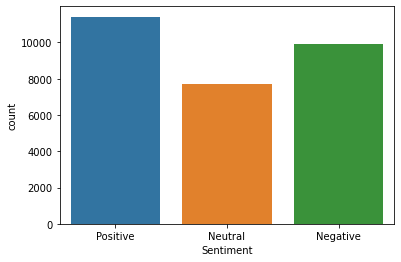

In [14]:
sns.countplot( x="Sentiment",order=[ "Positive",  "Neutral", "Negative"],
            data=train)

In [15]:
 
#Visualizing percentage of fiction to non fiction
from collections import Counter
print(Counter(train['Sentiment']))

Counter({'Positive': 11422, 'Negative': 9917, 'Neutral': 7713, 'Extremely Positive': 6624, 'Extremely Negative': 5481})


In [16]:
 title_type = train.groupby('Sentiment').agg('count')
print(title_type)

                    UserName  ScreenName  Location  TweetAt  OriginalTweet
Sentiment                                                                 
Extremely Negative      5481        5481      4249     5481           5481
Extremely Positive      6624        6624      5273     6624           6624
Negative                9917        9917      7763     9917           9917
Neutral                 7713        7713      6172     7713           7713
Positive               11422       11422      9110    11422          11422


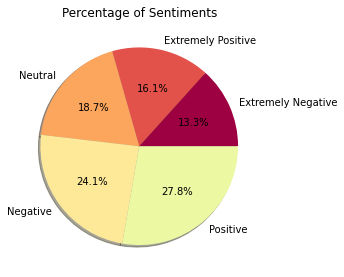

In [17]:
 import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
type_labels = title_type.UserName.sort_values().index 
type_counts = title_type.UserName.sort_values()
plt.figure(1, figsize=(50,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Percentage of Sentiments')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

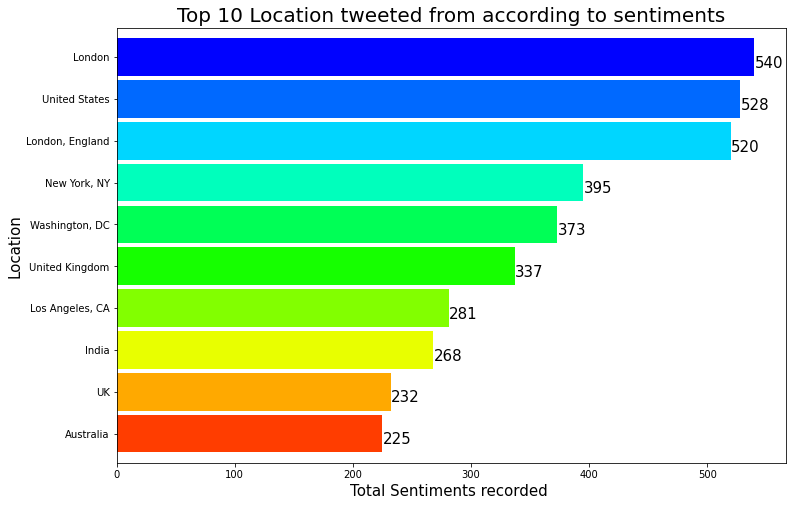

In [18]:
 
#Top 10 Cities tweeted from 
Locations = train.groupby('Location')['Sentiment'].count().reset_index().sort_values('Sentiment',ascending=False).head(10).set_index('Location')
plt.subplots(figsize=(12,8))
ax = Locations['Sentiment'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total Sentiments recorded ", fontsize=15)
ax.set_ylabel("Location", fontsize=15)
ax.set_title("Top 10 Location tweeted from according to sentiments",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

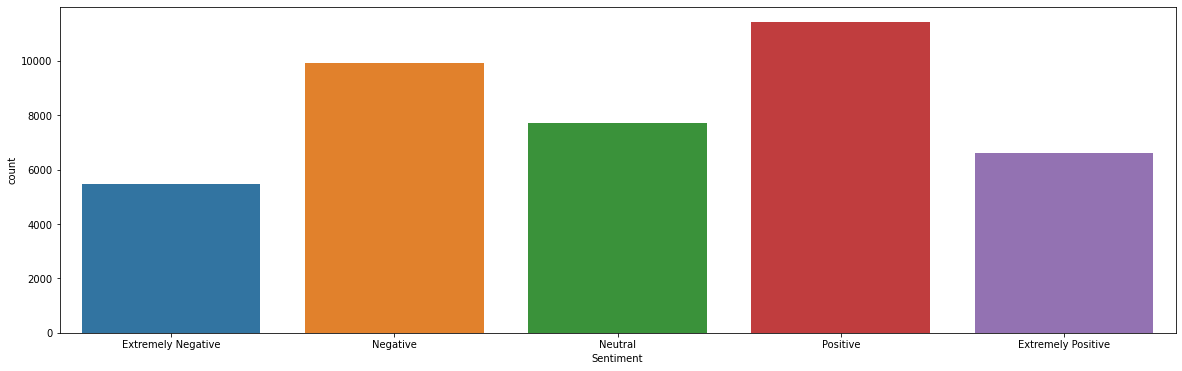

In [19]:
 plt.figure(figsize=(20,6))
sns.countplot(data=train, x='Sentiment', 
              order=["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])

In [20]:
 train['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [21]:
 print(Counter(train['Location']))

Counter({nan: 8590, 'London': 540, 'United States': 528, 'London, England': 520, 'New York, NY': 395, 'Washington, DC': 373, 'United Kingdom': 337, 'Los Angeles, CA': 281, 'India': 268, 'UK': 232, 'Australia': 225, 'USA': 223, 'Canada': 191, 'England, United Kingdom': 191, 'Toronto, Ontario': 160, 'Global': 159, 'Chicago, IL': 155, 'California, USA': 153, 'San Francisco, CA': 152, 'Boston, MA': 150, 'New York, USA': 140, 'New Delhi, India': 138, 'New York': 126, 'Atlanta, GA': 126, 'Mumbai, India': 109, 'Worldwide': 101, 'Lagos, Nigeria': 99, 'Houston, TX': 98, 'Texas, USA': 98, 'Austin, TX': 98, 'London, UK': 96, 'Toronto': 91, 'Los Angeles': 89, 'Nairobi, Kenya': 88, 'New York City': 87, 'Singapore': 87, 'Philadelphia, PA': 84, 'Florida, USA': 84, 'South Africa': 83, 'Nigeria': 83, 'Washington, D.C.': 80, 'Seattle, WA': 78, 'Sydney, New South Wales': 78, 'Mumbai': 76, 'Earth': 75, 'New Zealand': 74, 'San Diego, CA': 71, 'Melbourne, Victoria': 70, 'Dallas, TX': 68, 'Sydney, Australia'

(array([ 311., 1497., 3484., 4700., 5144., 5943., 6416., 9933., 3649.,
          80.]),
 array([ 11. ,  45.4,  79.8, 114.2, 148.6, 183. , 217.4, 251.8, 286.2,
        320.6, 355. ]),
 <a list of 10 Patch objects>)

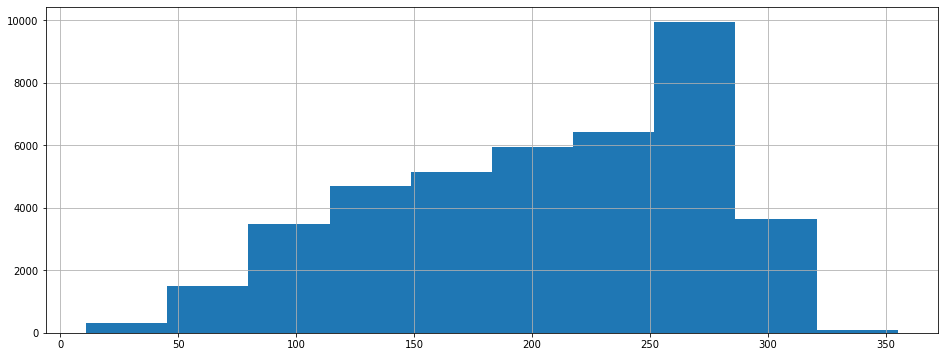

In [22]:
 plt.figure(figsize=(16,6))
plt.grid()
 
plt.hist(train['OriginalTweet'].str.len())

In [23]:
 train.OriginalTweet[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [24]:
 from wordcloud import WordCloud, STOPWORDS
 def wordCloud(sentiment):
    text = ",".join(
               review for review in train[train['Sentiment'] == sentiment].OriginalTweet 
        if 'COVID' not in review and 'https' not in review and 'Covid' not in review)
 
    wordcloud = WordCloud(max_words=200, colormap='Set2', background_color="black").generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figure(1,figsize=(12, 12))
    plt.title('Prevalent words in ' + sentiment + ' tweets', fontsize=19)
    plt.show()

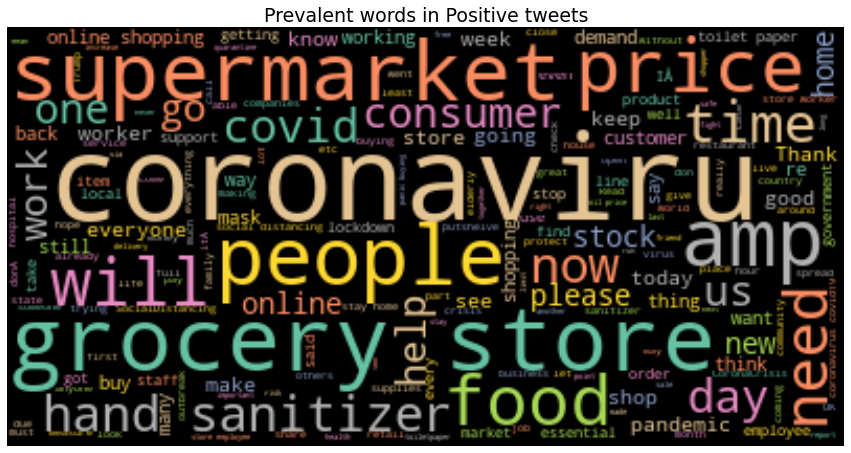

In [25]:
wordCloud("Positive")


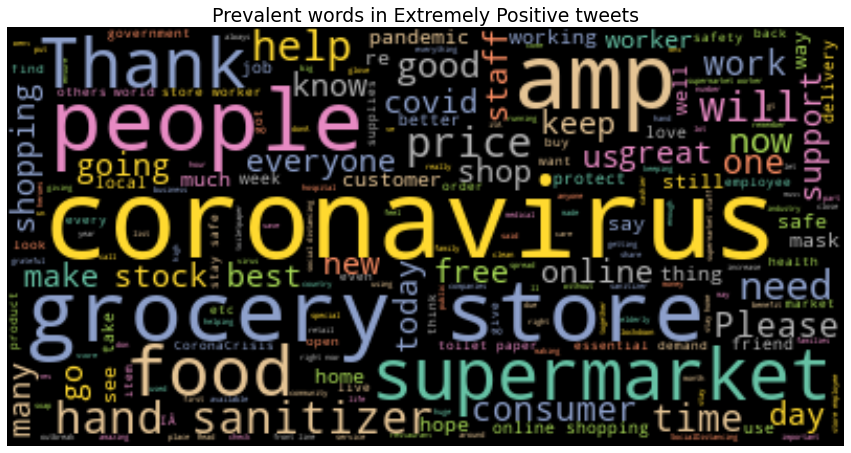

In [26]:
wordCloud("Extremely Positive")

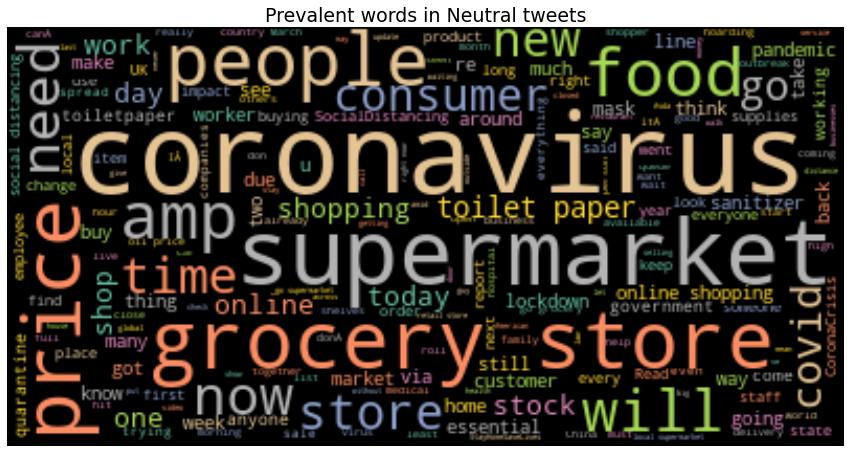

In [27]:
wordCloud("Neutral")

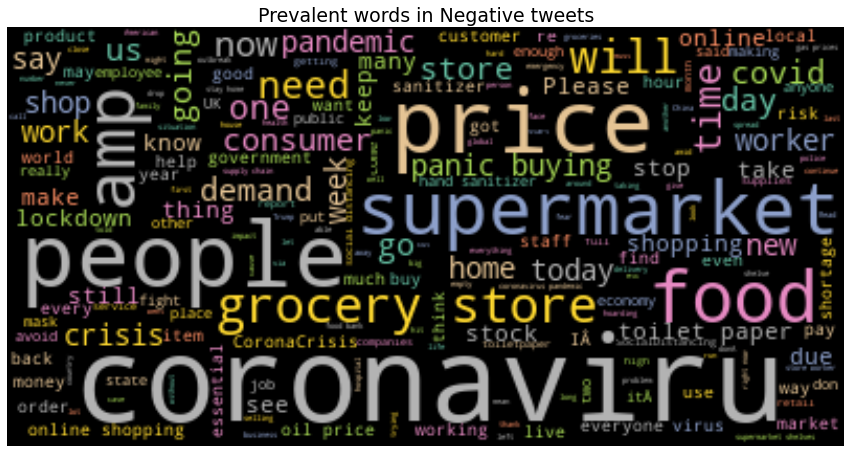

In [28]:
wordCloud("Negative")

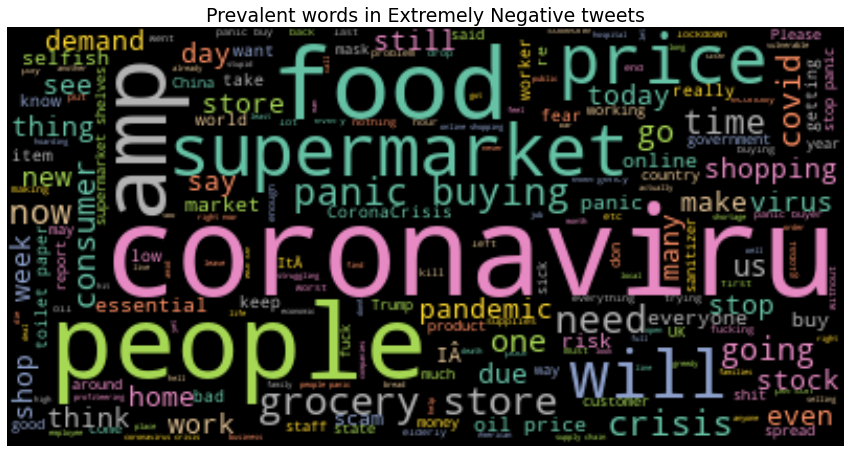

In [29]:
wordCloud("Extremely Negative")

In [30]:
train.OriginalTweet[8]

'Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i'

In [31]:
X_train = train['OriginalTweet'].str.replace(r'http\S+', "")
X_train = X_train.str.replace(r"#\S+", "")
X_train = X_train.str.replace(r"@\S+", "")
X_train = X_train.str.replace("\r", "")
X_train = X_train.str.replace("\n", "")
X_train = X_train.str.replace(r"[^\w\s]", "")
X_train = X_train.str.lower()

In [32]:
X_train[8]

'due to covid19 our retail store and classroom in atlanta will not be open for walkin business or classes for the next two weeks beginning monday march 16  we will continue to process online and phone orders as normal thank you for your understanding '

In [33]:
 def remove_stopwords(text):
    text_without_stopwords = list(filter(lambda i: i.strip() not in set(stopwords.words('english')), text.split()))
    return " ".join(text_without_stopwords)

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
X_train = X_train.apply(lambda word: remove_stopwords(word))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
X_train

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one emptyplease dont panic enough f...
4        ready go supermarket outbreaknot im paranoid f...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid19 rel...
41154    know itâs getting tough rationing toilet paper...
41155             wrong smell hand sanitizer starting turn
41156    well newused rift going 70000 amazon rn althou...
Name: OriginalTweet, Length: 41157, dtype: object

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
count_vectorizer = TfidfVectorizer()
X_train= count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(test['OriginalTweet'])
 
le = preprocessing.LabelEncoder()
le.fit(train['Sentiment'])
y_train = le.transform(train['Sentiment'])
y_test = le.transform(test['Sentiment'])

In [37]:
le.classes_

array(['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
       'Positive'], dtype=object)

In [38]:
 logReg = LogisticRegression(random_state=1)

In [39]:
logReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
cross_val_score(logReg, X_train, y_train, scoring='accuracy', cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.54992711, 0.56195335, 0.55667598, 0.56700279, 0.5609282 ])

In [41]:
 y_pred = logReg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.39      0.48       592
           1       0.72      0.44      0.55       599
           2       0.49      0.58      0.53      1041
           3       0.58      0.71      0.64       619
           4       0.50      0.57      0.53       947

    accuracy                           0.55      3798
   macro avg       0.58      0.54      0.55      3798
weighted avg       0.57      0.55      0.54      3798



In [42]:
 print(confusion_matrix(y_test, y_pred))

[[233   6 302  21  30]
 [ 11 265  34  21 268]
 [ 96  16 601 144 184]
 [ 11   5 108 437  58]
 [ 22  75 179 128 543]]


In [43]:
 def classes_def(x):
    if x == "Extremely Positive" or x == "Positive":
        return 2
    elif x == "Extremely Negative" or x == "Negative":
        return 0
    else:
        return 1
    
y_train_3classes = train['Sentiment'].apply(lambda x:classes_def(x))
y_test_3classes = test['Sentiment'].apply(lambda x:classes_def(x))

logReg.fit(X_train, y_train_3classes)
cross_val_score(logReg, X_train, y_train_3classes, scoring='accuracy', cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.78899417, 0.78680758, 0.78714615, 0.78994047, 0.79662252])

In [44]:
y_pred = logReg.predict(X_test)
print(classification_report(y_test_3classes, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1633
           1       0.69      0.62      0.65       619
           2       0.83      0.81      0.82      1546

    accuracy                           0.78      3798
   macro avg       0.77      0.75      0.76      3798
weighted avg       0.78      0.78      0.78      3798



In [45]:
 index_to_word = {v:k for k,v in count_vectorizer.vocabulary_.items()}
words_coef = {(index_to_word[i], logReg.coef_[0][i]) for i in range(logReg.coef_.shape[1])}
sorted(words_coef, key=lambda word_coef: word_coef[1], reverse=True)[:10]

[('crisis', 10.383831243703508),
 ('panic', 8.450993814170781),
 ('scams', 6.120930322390374),
 ('demand', 5.1323222978056),
 ('forced', 4.795069427846698),
 ('stop', 4.745154056328335),
 ('kill', 4.570804070325061),
 ('shit', 4.498850064720629),
 ('died', 4.46118771265917),
 ('fight', 4.230371349573345)]

LSTM Model

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [47]:
tokenizerlstm = Tokenizer( split=' ')
tokenizerlstm.fit_on_texts(train['OriginalTweet'].values)

X = tokenizerlstm.texts_to_sequences(train['OriginalTweet'])

X = pad_sequences(X)

In [48]:
 vocabSize = len(tokenizerlstm.word_index) + 1
vocabSize

85199

In [49]:
embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = 28))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [50]:
 from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
 
Le = LabelEncoder()
lb = preprocessing.LabelBinarizer()
 
y_train = lb.fit_transform(train['Sentiment'])

In [51]:
 y_test = lb.fit_transform(test['Sentiment'])

In [52]:
 y_train.shape

(41157, 5)

In [53]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X,y_train, test_size = 0.15, random_state = 42)
 
model.fit(X_trainl, y_trainl, validation_data = (X_testl, y_testl),epochs = 10, batch_size=32)

Epoch 1/10
1094/1094 [==============================] - 390s 353ms/step - loss: 0.4670 - accuracy: 0.3444 - val_loss: 0.2567 - val_accuracy: 0.7410
Epoch 2/10
1094/1094 [==============================] - 385s 352ms/step - loss: 0.2096 - accuracy: 0.7912 - val_loss: 0.2227 - val_accuracy: 0.7775
Epoch 3/10
1094/1094 [==============================] - 384s 351ms/step - loss: 0.0891 - accuracy: 0.9223 - val_loss: 0.2471 - val_accuracy: 0.7676
Epoch 4/10
1094/1094 [==============================] - 382s 349ms/step - loss: 0.0431 - accuracy: 0.9625 - val_loss: 0.2983 - val_accuracy: 0.7608
Epoch 5/10
1094/1094 [==============================] - 382s 349ms/step - loss: 0.0280 - accuracy: 0.9772 - val_loss: 0.3181 - val_accuracy: 0.7626
Epoch 6/10
1094/1094 [==============================] - 383s 351ms/step - loss: 0.0193 - accuracy: 0.9849 - val_loss: 0.3676 - val_accuracy: 0.7439
Epoch 7/10
1094/1094 [==============================] - 382s 349ms/step - loss: 0.0129 - accuracy: 0.9902 - val_

In [55]:
test_lstm = tokenizerlstm.texts_to_sequences(test['OriginalTweet'])
 
test_lstm = pad_sequences(test_lstm)

In [56]:
 lstm_pred = model.predict_classes(test_lstm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
 print(classification_report(np.argmax(y_test,1), lstm_pred))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63       592
           1       0.84      0.70      0.76       599
           2       0.62      0.65      0.63      1041
           3       0.57      0.79      0.66       619
           4       0.65      0.67      0.66       947

    accuracy                           0.66      3798
   macro avg       0.70      0.66      0.67      3798
weighted avg       0.69      0.66      0.66      3798



In [59]:
 print(confusion_matrix(np.argmax(y_test,1), lstm_pred))

[[296   0 276  13   7]
 [  0 417   7  19 156]
 [ 48   8 680 185 120]
 [  2   1  65 486  65]
 [  5  73  76 156 637]]
